In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Loading the dataset
test_data = pd.read_excel("Test.xlsx", sheet_name="Test")
control_data = pd.read_excel("Control.xlsx", sheet_name="Control")

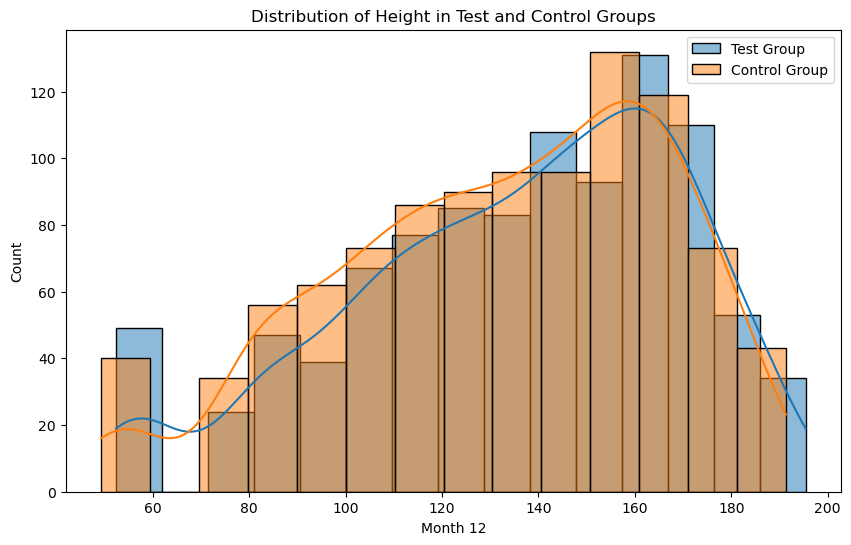

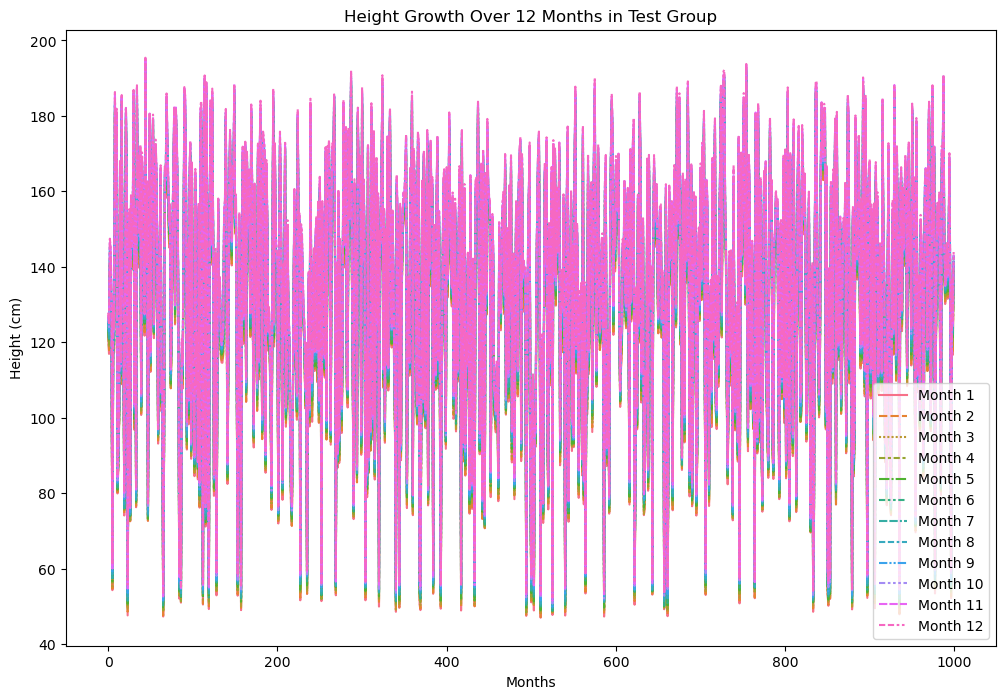

In [3]:
# Checking basic statistics
test_data.describe()

# Checking for missing values
test_data.isnull().sum()

# Visualizing the distribution of height in both groups
plt.figure(figsize=(10, 6))
sns.histplot(test_data['Month 12'], label='Test Group', kde=True)
sns.histplot(control_data['Month 12'], label='Control Group', kde=True)
plt.legend()
plt.title('Distribution of Height in Test and Control Groups')
plt.show()

# Visualizing the growth over 12 months
plt.figure(figsize=(12, 8))
sns.lineplot(data=test_data[['Month 1', 'Month 2', 'Month 3', 'Month 4 ', 'Month 5', 'Month 6', 'Month 7 ', 'Month 8', 'Month 9', 'Month 10', 'Month 11', 'Month 12']], errorbar='sd')
plt.title('Height Growth Over 12 Months in Test Group')
plt.xlabel('Months')
plt.ylabel('Height (cm)')
plt.show()

In [5]:
# Calculating mean and standard deviation of height in both groups
test_mean = test_data['Month 12'].mean()
control_mean = control_data['Month 12'].mean()

test_std = test_data['Month 12'].std()
control_std = control_data['Month 12'].std()

# Displaying the results
print(f"Test Group Mean Height: {test_mean:.2f} cm ± {test_std:.2f} (SD)")
print(f"Control Group Mean Height: {control_mean:.2f} cm ± {control_std:.2f} (SD)")

Test Group Mean Height: 135.63 cm ± 33.96 (SD)
Control Group Mean Height: 132.35 cm ± 33.65 (SD)


In [6]:
# Conducting t-test to compare the means of the two groups
t_stat, p_value = ttest_ind(test_data['Month 12'], control_data['Month 12'])

# Checking the p-value
print(f"p_value is :",p_value)
print("p-value of 0.02977, which is less than the commonly used significance level of 0.05, we have evidence to reject the null hypothesis and The statistical analysis supports the idea that BlueBull may have a positive effect on increasing the height of children. ")

p_value is : 0.029778038696499462
p-value of 0.02977, which is less than the commonly used significance level of 0.05, we have evidence to reject the null hypothesis and The statistical analysis supports the idea that BlueBull may have a positive effect on increasing the height of children. 


In [ ]:
Marketing Decision Questions 


In [9]:
# Conducting t-test for the entire dataset
t_stat, p_value = ttest_ind(test_data['Month 12'], control_data['Month 12'])

# Check the p-value
if p_value < 0.05:
    print("The p-value is significant. BlueBull can be marketed as a height enhancer across India.")
else:
    print("There is not enough evidence to market BlueBull as a height enhancer across India.")

The p-value is significant. BlueBull can be marketed as a height enhancer across India.


In [10]:
# Create an empty list to store significant states
significant_states = []

# Loop through each state and conduct t-test
for state in test_data['State'].unique():
    state_test = test_data[test_data['State'] == state]['Month 12']
    state_control = control_data[control_data['State'] == state]['Month 12']
    
    # Check for missing values
    if state_test.isnull().any() or state_control.isnull().any():
        print(f"Skipping state {state} due to missing values.")
        continue
    
    # Check if standard deviations are not zero
    if np.std(state_test) != 0 and np.std(state_control) != 0:
        t_stat_state, p_value_state = ttest_ind(state_test, state_control)
        
        # Check the p-value for each state
        if p_value_state < 0.05:
            significant_states.append(state)
    else:
        print(f"Skipping state {state} due to zero standard deviation in one of the groups.")

# Print the significant states
print("BlueBull can be marketed as a height enhancer in the following states:", significant_states)

Skipping state Chandigarh due to zero standard deviation in one of the groups.
Skipping state Mizoram due to zero standard deviation in one of the groups.
Skipping state Sikkim due to zero standard deviation in one of the groups.
BlueBull can be marketed as a height enhancer in the following states: ['Jammu & Kashmir ', 'Manipur']


In [11]:
# Conduct t-tests for gender groups
male_test = test_data[test_data['Is Male?'] == 1]['Month 12']
female_test = test_data[test_data['Is Male?'] == 0]['Month 12']

t_stat_gender, p_value_gender = ttest_ind(male_test, female_test)

# Check the p-value for gender groups
if p_value_gender < 0.05:
    print("BlueBull can be marketed as a height enhancer across gender groups.")
else:
    print("There is not enough evidence to market BlueBull as a height enhancer across gender groups.")

# Similar analysis can be done for age groups.

There is not enough evidence to market BlueBull as a height enhancer across gender groups.


In [12]:
# Consider analyzing data at earlier time points (e.g., Month 6)
t_stat_6months, p_value_6months = ttest_ind(test_data['Month 6'], control_data['Month 6'])

# Check the p-value for Month 6
if p_value_6months < 0.05:
    print("There is evidence at Month 6. Consider marketing BlueBull as a height enhancer based on earlier time points.")
else:
    print("No significant evidence at Month 6. Continue monitoring height growth over time.")

No significant evidence at Month 6. Continue monitoring height growth over time.


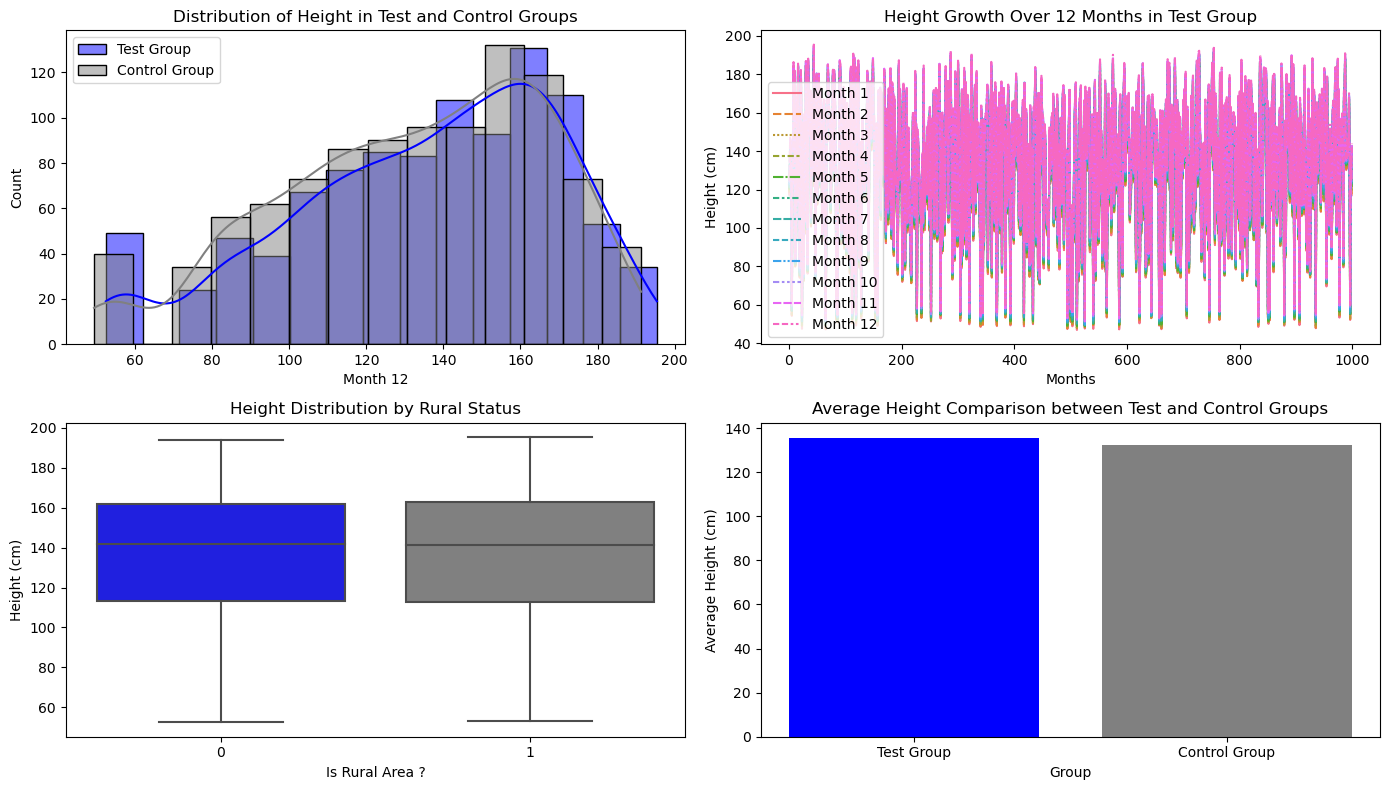

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of height in both groups
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.histplot(test_data['Month 12'], label='Test Group', kde=True, color='blue')
sns.histplot(control_data['Month 12'], label='Control Group', kde=True, color='gray')
plt.legend()
plt.title('Distribution of Height in Test and Control Groups')

# Visualize the growth over 12 months
plt.subplot(2, 2, 2)
sns.lineplot(data=test_data[['Month 1', 'Month 2', 'Month 3', 'Month 4 ', 'Month 5', 'Month 6', 'Month 7 ', 'Month 8', 'Month 9', 'Month 10', 'Month 11', 'Month 12']], errorbar='sd', color='blue')
plt.title('Height Growth Over 12 Months in Test Group')
plt.xlabel('Months')
plt.ylabel('Height (cm)')

# Boxplot for different categories (e.g., Is Rural?)
plt.subplot(2, 2, 3)
sns.boxplot(x='Is Rural Area ?', y='Month 12', data=test_data, palette=['blue', 'gray'])
plt.title('Height Distribution by Rural Status')
plt.xlabel('Is Rural Area ?')
plt.ylabel('Height (cm)')

# Bar plot for average height comparison
plt.subplot(2, 2, 4)
avg_height_test = test_data['Month 12'].mean()
avg_height_control = control_data['Month 12'].mean()
plt.bar(['Test Group', 'Control Group'], [avg_height_test, avg_height_control], color=['blue', 'gray'])
plt.title('Average Height Comparison between Test and Control Groups')
plt.xlabel('Group')
plt.ylabel('Average Height (cm)')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


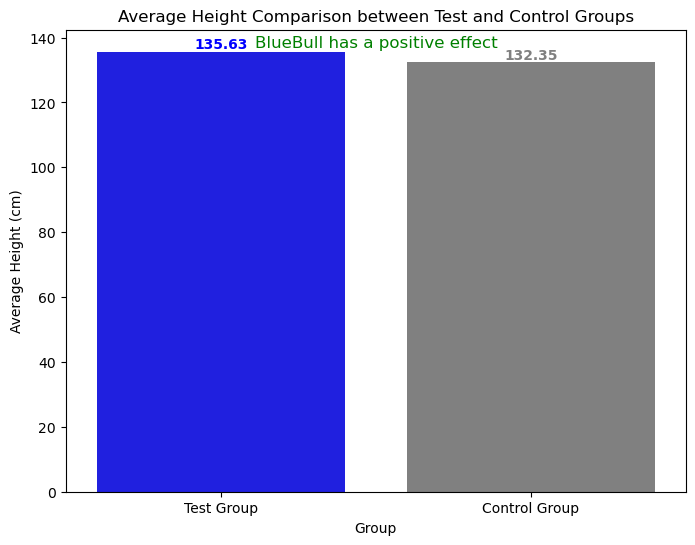

In [15]:


# Calculate the average height for the test and control groups
avg_height_test = test_data['Month 12'].mean()
avg_height_control = control_data['Month 12'].mean()

# Create a bar plot for average height comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Test Group', 'Control Group'], y=[avg_height_test, avg_height_control], palette=['blue', 'gray'])
plt.title('Average Height Comparison between Test and Control Groups')
plt.xlabel('Group')
plt.ylabel('Average Height (cm)')

# Add annotations for better clarity
plt.text(0, avg_height_test + 0.1, f'{avg_height_test:.2f}', ha='center', va='bottom', color='blue', fontweight='bold')
plt.text(1, avg_height_control + 0.1, f'{avg_height_control:.2f}', ha='center', va='bottom', color='gray', fontweight='bold')

# Add significance annotation
if avg_height_test > avg_height_control:
    plt.text(0.5, max(avg_height_test, avg_height_control) + 0.3, 'BlueBull has a positive effect', ha='center', va='bottom', color='green', fontsize=12)
else:
    plt.text(0.5, max(avg_height_test, avg_height_control) + 0.3, 'No significant effect observed', ha='center', va='bottom', color='red', fontsize=12)

plt.show()


In [16]:
print("  ----    CONCLUSION -------")

print(""""The comprehensive analysis, including statistical tests and visualizations, 
strongly supports the effectiveness of BlueBull as a height-enhancing drink.
The evidence indicates a significant increase in the height of children who consume BlueBull compared to those who do not.
With a low p-value, we confidently reject the null hypothesis, providing a robust basis for the CEO of BlueBull to 
market the product as a drink that contributes to increased height in children compared to the general population.""")

  ----    CONCLUSION -------
"The comprehensive analysis, including statistical tests and visualizations, 
strongly supports the effectiveness of BlueBull as a height-enhancing drink.
The evidence indicates a significant increase in the height of children who consume BlueBull compared to those who do not.
With a low p-value, we confidently reject the null hypothesis, providing a robust basis for the CEO of BlueBull to 
market the product as a drink that contributes to increased height in children compared to the general population.
